# Class 2: Coding Tour


### 1. Pandas
    
    1.1 Reading in a pandas dataframe
    1.2 Inspecting a dataframe
    1.3 Modifying columns
    1.4 Indexing and slicing
    1.5 Summary statistics
    1.6 Apply operations
    1.7 Groupby


### 2. NumPy

    2.1 Basic operations
    2.2 Joining arrays
    2.3 Multidimensional arrays
    2.4 Missing values


### 3. Classes


### 4. Reading and Writing Files
    4.0 Filepaths
    4.1 Pandas
    4.2 NumPy
    4.3 Pickle
    


# 1. Pandas

Pandas is *the* library in Python when working with tabular data.

But.... It sucks....

Compared to tidyverse or data.table in R (or the syntax in Stata), pandas is so messy.

But.... Since we are used to think in data in terms of rows and columns, it is the most convenient to store data in Python.

In [1]:
import pandas as pd

### 1.1 Reading and writing using Pandas

In [ ]:
# Specify filepath. REMEMBER TO CHANGE THE PATH TO YOUR OWN!!!
# Note that you can download the data from the course GitHub repo in the data/ folder.
# It is very important to specify the correct filepath. 
# Whether the '/'s should turn / or \ this way me depend on your operating system
fpath = 'C:/Users/au535365/Dropbox/teaching/css_fall2023/data/Corp_Folketing.csv'

In [ ]:
# Read in the filepath to pandas - we explain this later in the tutorial :-)
df = pd.read_csv(fpath)

## Detour - Absolute and Relative Filepaths

Directory, folders, and filepaths are boring, but key koncepts when working with data. We simply needs to know where our data, code, and so on are located.  

In [2]:
import os

In [ ]:
# Get current working directory with os.getcwd()
os.getcwd()

In [ ]:
# We are starting in the working directory and everything moves from there
os.listdir()

In [ ]:
# Change working directory with os.chdir()
os.chdir('C:/Users/au535365/Dropbox/teaching/css-fall2023')

In [3]:
os.chdir('C:/Users/au535365/Dropbox/teaching/css_fall2023')

In [4]:
# Absolute path
fpath = 'C:/Users/au535365/Dropbox/teaching/css_fall2023/data/Corp_Folketing.csv'
df = pd.read_csv(fpath)

In [5]:
# Relative path
df = pd.read_csv('data/Corp_Folketing.csv', sep=',')

### 1.2 Inspecting a dataframe

In [ ]:
# Overview of what's in the dataframe:
# Number of rows
# Number of columns
# Type of columns

df.info()

In [ ]:
# Get column names
df.columns

In [ ]:
# See top n rows (see bottom n rows with .tail)
df.head(n=5)

In [ ]:
# See unique values in column 
df['date'].unique().tolist()

In [ ]:
# Columns can also be accessed like this. I prefer this way.
df['date']

### 1.3 Modifying columns

    - Renaming
    - Type casting

In [6]:
# Rename columns
df.rename(columns={'party.facts.id': 'party_id'}, inplace=True)

In [7]:
# Type casting of column. Bit complicated sometimes if the column has NaNs. I often use a work-around solution.
df['party_id'] = pd.Series([int(x) if pd.notnull(x) else None for x in df['party_id'].tolist()], dtype=object)

In [ ]:
# Type casting is straightforward without NaNs
df['speechnumber'] = df['speechnumber'].astype(float)
df['speechnumber']

In [8]:
# Convert back to int
df['speechnumber'] = df['speechnumber'].astype(int)
df['speechnumber']

0         1
1        99
2       199
3        89
4        26
       ... 
7717    826
7718    926
7719     55
7720    155
7721    255
Name: speechnumber, Length: 7722, dtype: int32

### 1.4 Indexing and slicing

The most fundamental action in data analysis is the ability to “select” elements within your dataset.

Pandas indexing and slicing is a little bit tedious I think. 

Two ways:
* `.loc`  (label indexing)
* `.iloc` (integer indexing)

Usually, I prefer `.loc` since it is more explicit.

Often, we want to select specific rows, columns or even some specific cells.

In [9]:
# Subset a dataframe to include speeches given by legislators from S
df_s = df.loc[df['party'] == 'S']
df_s

,date,agenda,speechnumber,speaker,party,party_id,chair,terms,text,parliament,iso3country
9,1997-10-29,1) Spørgsmål til ministrene.,59,Birte Weiss,S,379,False,73,Min holdning til det svarer til justitsministe...,DK-Folketing,DNK
11,1997-10-30,1) Forespørgsel nr. F 2: Forespørgsel til inde...,106,Thorkild Simonsen,S,379,False,503,"Hr. Thulesen Dahl spørger om, hvor mange der e...",DK-Folketing,DNK
13,1997-11-04,5) Første behandling af lovforslag nr. L 36: F...,36,Ole Vagn Christensen,S,379,False,463,Socialdemokratiet kan varmt støtte initiativet...,DK-Folketing,DNK
14,1997-11-05,1) Spørgsmål til ministrene.,11,Frank Jensen,S,379,False,192,"Jeg har forstået, at det her er ved at udvikle...",DK-Folketing,DNK
15,1997-11-05,1) Spørgsmål til ministrene.,111,Frank Jensen,S,379,False,309,"Det er jo ikke tilladt under de regler, der gæ...",DK-Folketing,DNK
...,...,...,...,...,...,...,...,...,...,...,...
7704,2018-12-14,Forespørgsel nr. F 10: Forespørgsel til ældr...,299,Astrid Krag,S,379,False,175,Tak for det. Ministeren repræsenterer jo et pa...,DK-Folketing,DNK
7709,2018-12-19,"3. behandling, 1. del af lovforslag nr. L 1: ...",26,Benny Engelbrecht,S,379,False,126,Først og fremmest er der en uløst udfordring i...,DK-Folketing,DNK
7717,2018-12-19,"3. behandling, 1. del af lovforslag nr. L 1: ...",826,Nicolai Wammen,S,379,False,185,"Man kan i hvert fald konstatere, at finansmini...",DK-Folketing,DNK
7718,2018-12-19,"3. behandling, 1. del af lovforslag nr. L 1: ...",926,Flemming Møller Mortensen,S,379,False,231,"Sundhed – finansministeren taler om, at regeri...",DK-Folketing,DNK


In [ ]:
# Extract first row with .loc
# What happens here?
df_s.loc[0]

In [ ]:
# Extract first row with .iloc
# What happens here?
df_s.iloc[0]

In [ ]:
# To enable using df_s.loc[0,:], we need to reset indices. NB: USE WITH CARE!!!!
df_s.reset_index(drop=True, inplace=True)

In [ ]:
# Get speaker value for the 10th row using .loc
df_s.loc[10, 'speaker']

In [ ]:
# This returns an error since iloc assumes we use integers to index the dataframe
df_s.iloc[10, 3]

In [ ]:
# Slice a dataframe from the first to the 20th element by taking every second value.
df_s.loc[0:20:2, ['party', 'speaker']]

In [ ]:
# Remove rows with chair == False
df = df.loc[df['chair'] == False]

In [ ]:
df['party'].unique()

In [10]:
# Keep only speeches given by legislators from certain parties
red_parties = ['S', 'EL', 'SF', 'RV', 'ALT']
blue_parties = ['V', 'DF', 'KF', 'LA']

df = df.loc[df['party'].isin(red_parties + blue_parties)]

In [ ]:
df

In [11]:
# Reset indices
df.reset_index(drop=True, inplace=True)

### 1.5 Summary statistics

In [ ]:
# Count values by party
df['party'].value_counts()

In [ ]:
# Summary stats - only applicable to numerical values
df['terms'].describe()

### 1.6 Apply

The `apply()` inherits from the pandas module and is very effective in applying a function on an element-wise basis.

If we, for instance, want to convert all values in a column to 1 if X and to 0 if Y, this can be done using the `apply()`.




In [12]:
# We want to extract the year from the data variable. 
df['date'].apply(lambda x: x.split('-')[0])

0       1997
1       1997
2       1997
3       1997
4       1997
        ... 
4364    2018
4365    2018
4366    2018
4367    2018
4368    2018
Name: date, Length: 4369, dtype: object

In [13]:
# Can be directly assigned as a new column: 
df['year'] = df['date'].apply(lambda x: x.split('-')[0])

In [ ]:
# Conditional value assignment 
df['party_S'] = df['party'].apply(lambda x: 1 if x == 'S' else 0)

In [ ]:
# To see why it is neccesary, consider this example. Here we are computing the length of the text column. 
# Do you think the `len()` function returns the length at an element-wise operation? Well...
df['chars'] = len(df['text'])
print(df['chars'])

In [ ]:
df['chars'] = len(df['text'])

In [14]:
# We need the apply method!
df['chars'] = df['text'].apply(lambda x: len(x))
print(df['chars'])

0       2386
1       3586
2        804
3       2639
4       1225
        ... 
4364     598
4365    1114
4366    1369
4367    2218
4368     634
Name: chars, Length: 4369, dtype: int64


### 1.7 Groupby

The `.groupby()` operation is very convenient when we want to operate within groups.


In [15]:
# Grouping dataframes by one or more columns. 
terms_df = df.groupby(['party'])['terms'].describe()

In [ ]:
terms_df

In [ ]:
# Simple clean-up
terms_df['party'] = terms_df.index.tolist()
terms_df.reset_index(drop=True, inplace=True)

# Now we can see which parties use most words on average
terms_df

In [ ]:
grouped_df = df.groupby(['party', 'year'])['terms'].describe().reset_index()
grouped_df

In [16]:
# Extract only the mean
grouped_df = df.groupby(['party', 'year'])['terms'].mean().reset_index()
grouped_df

,party,year,terms
0,ALT,2015,507.000000
1,ALT,2016,169.500000
2,ALT,2017,128.666667
3,ALT,2018,208.052632
4,DF,1997,371.666667
...,...,...,...
164,V,2014,158.906250
165,V,2015,142.285714
166,V,2016,200.117647
167,V,2017,199.606061


In [ ]:
df['party_mean_terms'] = df.groupby(['party', 'year'])['terms'].transform('mean')

In [ ]:
df

In [ ]:
# We need to make sure that Python interpret the data correctly.
# grouped_df['year'] = grouped_df['year'].astype(int)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [18]:
#grouped_df.loc[0, 'year']
grouped_df['year'] = grouped_df['year'].astype(int)

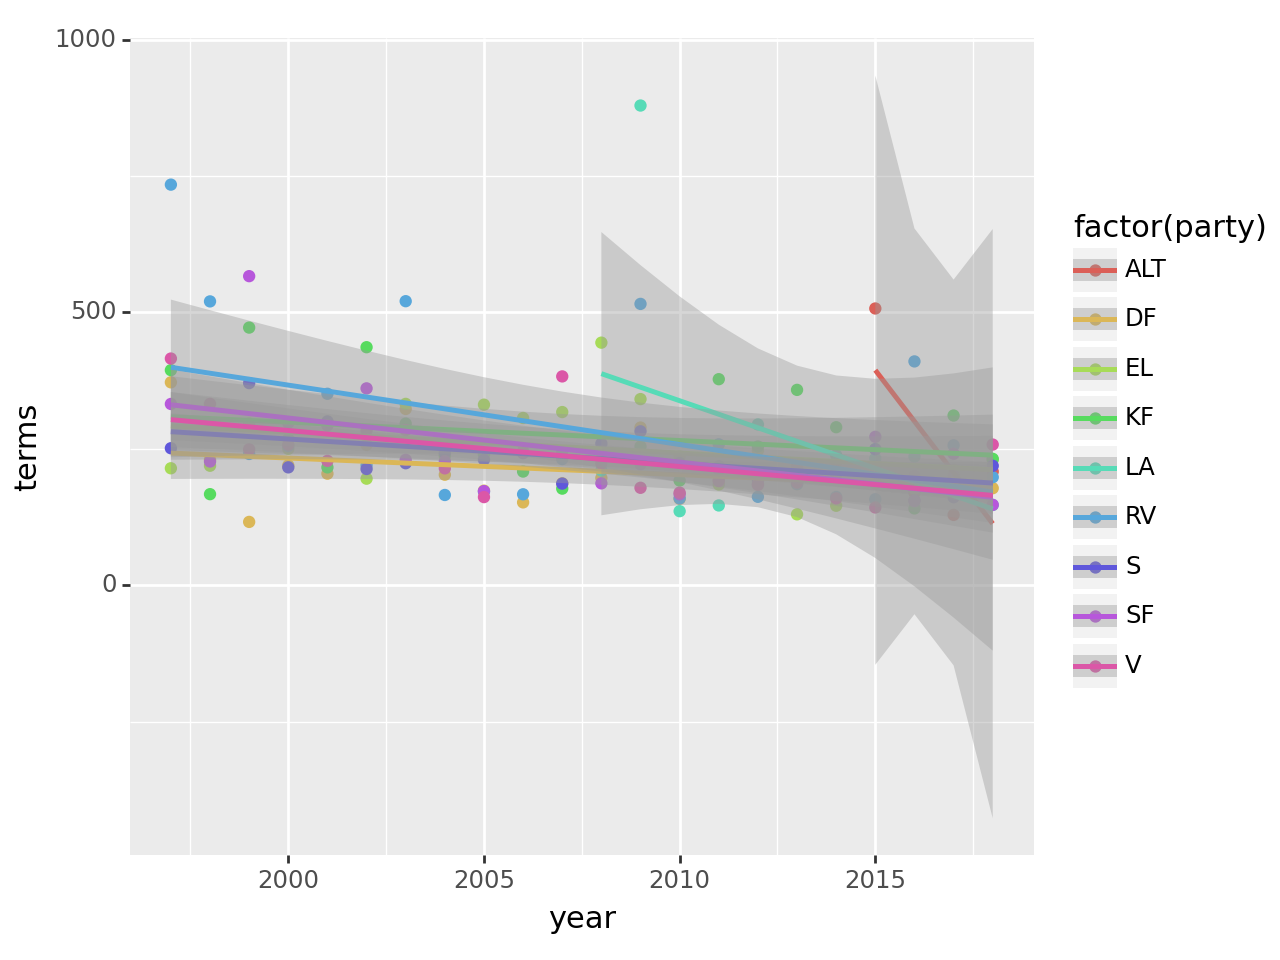

<Figure Size: (640 x 480)>

In [20]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(grouped_df, aes("year", "terms", color="factor(party)"))
 + geom_point()
 + stat_smooth(method="lm"))

In [ ]:
!pip install plotnine

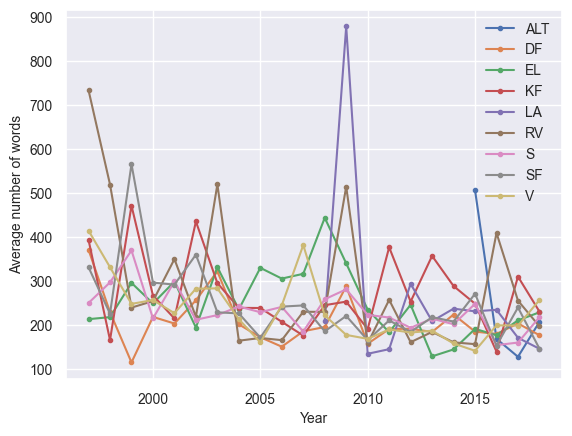

In [19]:
# Plot the mean number of words for each party over time
fig, ax = plt.subplots()
for k, v in grouped_df.groupby('party'):
    v.plot(x='year', y='terms', label=k, ax=ax, marker='o', markersize=3)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average number of words', fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(frameon=False, fontsize=10)
plt.show()

# 2. NumPy 

Almost everything in Python has ties to NumPy, short for **Numerical Python**. 

Often, you will be in a case where you have a Pandas dataframe, which you want to pass forward to NumPy. 

NumPy is very efficient and exploits that computers are very fast at using linear algebra. 

In [22]:
import numpy as np

### 2.1 Basic operations

In [23]:
# Create 1d array
myarr0 = np.arange(10)
myarr0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
# Create another 1d array
myarr1 = myarr0 ** 2

In [ ]:
# Identical in values to:
mylist0 = list(range(10))

In [ ]:
# What's the shape of array? (row, col) syntax
myarr0.shape

In [ ]:
# Indexing works just like for lists - get first two elements like this:
myarr0[:2]

In [ ]:
# Filtering a 1d array
myarr0[myarr1 < 10]

In [ ]:
# Filtering numbers by multiple conditions
myarr0[(myarr0 >= 5) & (myarr0 <= 10) | (myarr0 < 2)]

In [25]:
# Replacing values in a 1d array
myarr1[myarr1 < 10] = 0
myarr1

array([ 0,  0,  0,  0, 16, 25, 36, 49, 64, 81])

In [ ]:
# Reshaping an array
myarr1 = myarr0.reshape(2,5)

# Now it is two dimensional!
myarr1.shape

In [ ]:
# Setting the col to -1 means that NumPy will figure it out
myarr2 = myarr0.reshape(2, -1)
myarr2.shape

In [ ]:
# # We can automatically increase the dimension of our array by using np.newaxis
print(f"Dimensions of original array: {myarr0.shape}")
print(f"Dimensions of modified array: {myarr0[:, np.newaxis].shape }")

In [ ]:
# Extract indices where two arrays match

a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

np.where(a == b)[0]

In [ ]:
# Find maximum value element-wise
a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

[np.max([a,b]) for a, b in zip(a, b)]

In [ ]:
# Find index of max and min value
np.argmax(a), np.argmin(a)

In [ ]:
# Stats
np.mean(a), np.std(a), np.max(a), np.min(a)

In [ ]:
# Find unique values
a = np.array([0,0,1,1])
np.unique(a)

In [ ]:
# Many numpy operations also work on lists!
np.unique([0,0,1, 1])

In [ ]:
# Sort an array
a = np.array([1,2,9,5,4])
np.sort(a)

In [ ]:
# Get indices which will sort an array
np.argsort(a)

In [ ]:
# Sort using argsort
a[np.argsort(a)]

In [ ]:
# Check if array has certain elements
np.isin(a, [0, 1, 2])

In [ ]:
# Save an array like this:
np.save('some_array', a)

### 2.2 Joining arrays

In [ ]:
# Vertical stacking of arrays
a = np.arange(10)
b = np.repeat(1, 10)

m = np.vstack([a,b])
print(f"Array: \n{m}\n\n")
print(f"Shape of array: {m.shape}")

In [ ]:
a, b = a.reshape(2,5), b.reshape(2,5)

m = np.vstack([a,b])
print(f"Array: \n{m}\n\n")
print(f"Shape of array: {m.shape}")

In [ ]:
# Horizontal stacking - basically concatenation
# Solution:
a = np.arange(10)
b = np.repeat(1, 10)

m = np.hstack([a,b])
print(f"Array: \n{m}\n\n")
print(f"Shape of array: {m.shape}")

In [ ]:
# Concatenation: row-wise
print(np.concatenate([a, b], axis=0))

In [ ]:
# Concatenation: column-wise
np.concatenate([a, b], axis=1)

# Not possible due to 1d arrays!

In [ ]:
a, b = a.reshape(2,5), b.reshape(2,5)
np.concatenate([a, b], axis=1)

### 2.3 N-dimensional arrays (matrices)

The real power of NumPy comes from the ability to handle N dimensions and not just a single one. We have already seen that arrays can have more than one dimension.

In [ ]:
# Create a matrix of dimension 3x3 of booleans. 

# One solution:
m0 = np.ones((3,3), dtype=bool)

# Another solution
m1 = np.ones((9), dtype=bool).reshape(3,3)

m0==m1

In [ ]:
# Generate 3x4 matrix with random numbers
array = np.random.randn(3, 4)
array

In [ ]:
# Subsetting row 1, column 1 - What's the expected output?
array[1,1]

In [ ]:
array[0,]

In [ ]:
# indexing row 1, and col from 1 to the last col
array[1:,1:]

In [ ]:
# Reverse rows
array[::-1 , :]

In [ ]:
# Reverse cols
array[: , ::-1]

In [ ]:
multiarray = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
multiarray.shape            # 2 arrays, each with dimension 2x3

In [ ]:
multiarray = np.array([[[1, 2], [4, 5]], [[7, 8], [10, 11]], [[9, 10], [10, 10]]])
multiarray.shape            # 3 arrays, each with dimension 2x2

### 2.4 Missing values

In [ ]:
# Find missing values using np.isnan
missing_array = np.array([1,2,2, np.nan, np.nan, 3])
missing_bool = np.isnan(missing_array)
missing_bool

In [ ]:
# Combine with np.where to get indices
np.where(missing_bool)[0]

In [ ]:
# np.isnan also works on N-dimensional arrays
missing_array0 = np.array([1,2,2, np.nan, np.nan, 3])
missing_array1 = np.array([1,np.nan,2, 3, np.nan, 3])
np.isnan(np.vstack([missing_array0, missing_array1]))

# 3. Classes 

Classes are a fundamental concept in object-oriented programming, and they allow you to create custom data types with attributes (variables) and methods (functions) associated with them. 

You will rarely need to make classes yourself, but everything you use is a class!

In [ ]:
# Define a class named "Student" - we use the 'class' keyword
class Student:
    
    # Constructor method (__init__) initializes the object's attributes
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade

    # Method to display student information
    def display_info(self):
        logage = np.log(self.age)
        print(f"Name: {self.name}, Age: {self.age}, Grade: {self.grade}")

In [ ]:
# Create instances (objects) of the Student class
student1 = Student("Alice", 18, "A")
student2 = Student("Bob", 17, "B")

# Accessing attributes and calling methods of the objects
print("Student 1:")
student1.display_info()  

print("\nStudent 2:")
student2.display_info()

In [ ]:
student1.name, student1.age, student1.grade

In [ ]:
student1.logage

In [ ]:
#  Sometimes, we want a class to inherit from another class. We will encounter this when we build neural networks with PyTorch.

class Person:
    """Example of the base class"""
    def __init__(self, name):
        self.name = name

    def get_name(self):
        """Get person name"""
        return self.name


class Employee(Person):
    def __init__(self, name, staff_id):
        super().__init__(name)
        self.staff_id = staff_id

    def get_full_id(self):
        """Get full employee id"""
        return self.get_name() + ', ' + str(self.staff_id)

In [ ]:
emp = Employee(name='Bob', staff_id=10)

In [ ]:
# Employee inherits the .get_name() method from the Person class!
emp.get_name()

In [ ]:
# but we can still access the methods specific to the new class
emp.get_full_id()

# 4. Files 

Reading and writing files in Python is usually quite simple and have, as everything else, awesome documentation and community-support. 

There are a few ways that it is good to get your hands around:

0. Filepaths
1. Pandas
2. NumPy
3. Pickle
4. Parquet
5. Base Python


### 4.0 Filepaths

Filepaths might seem simple, but often causes a lot of trouble, in particular across operating systems.

Luckily, Python has some great tools to make you work with paths.

The first important thing to notice is the difference between *absolute* and *relative* filepaths.

In [ ]:
# What is this? 
'C:/Users/au535365/Dropbox/teaching/css_fall2023/data/Corp_Folketing.csv'

In [ ]:
# What about this?
'data/Corp_Folketing.csv'

When you open a Jupyter Notebook, you always starts at the directory from which you opened the notebook. 

We can check it directly using the `os` module and the `.getcwd()` method, which is short for '**get** **c**urrent **w**orking **d**irectory'.

In [ ]:
import os
os.getcwd()

We want to start from the outer folder of our project, in my case it is `css_fall2023`

I change it by using the `os` module and the `.chdir` method, which is short for '**ch**ange **dir**ectory'.

It is good practice to do that in the beginning of each notebook you are working with!

In [ ]:
os.chdir('C:/Users/au535365/Dropbox/teaching/css_fall2023/')

In [ ]:
os.getcwd()

### 4.1 Pandas

In [ ]:
# Reading using absolute path
fpath = 'C:/Users/au535365/Dropbox/teaching/css_fall2023/data/Corp_Folketing.csv'
df = pd.read_csv(fpath)

In [ ]:
# Reading using relative path
fpath = 'data/Corp_Folketing.csv'
df = pd.read_csv(fpath)

In [ ]:
# Reading using relative path with extra added /
fpath = '/data/Corp_Folketing.csv'
df = pd.read_csv(fpath)

In [ ]:
# Writing 
df[::20].to_csv('data/tester.csv', index=False)

### 4.2 NumPy

In [ ]:
# Reading
from io import StringIO   # StringIO behaves like a file object

c = StringIO("0 1\n2 3")

a = np.loadtxt(c)

In [ ]:
# Writing 
np.savetxt('data/nparray-txt.npy'), a, delimiter=' ')
np.save('data/nparray-npy.npy', a)

In [ ]:
# Reading
np.loadtxt('data/nparray-txt.npy')

In [ ]:
# Reading 
np.load('data/nparray-npy.npy')

### 4.3 Pickle

In [ ]:
import pickle

In [ ]:
# Reading
# The 'rb' argument specifies that we are loading a file
fpath = 'data/diarization'
with open(fpath, 'rb') as f:
    data = pickle.load(f)
    f.close()

In [ ]:
# Writing
# The 'wb' argument specifies that we are saving a file
fpath = 'data/diarization-new'
with open(fpath, 'wb') as f:
    pickle.dump(data, f)       # object in first pos, filepath in second pos
    f.close()

### 4.4 Parquet (Optional)

In [ ]:
# Parquet is a very efficient way of save data, but also a bit tricky. Play around if you feel for it.
# import pyarrow as pa
# parquet_table = pa.Table.from_pandas(df)
# pa.parquet.write_table(parquet_table, '/home/rask/Dropbox/teaching/css_fall2023/data/Corp_Folketing.parquet')

### 4.5 Base Python (Optional)

In [ ]:
# import csv
# fpath = '/home/rask/Dropbox/teaching/css_fall2023/data/tabseparated.txt'

# # Reading
# with open(fpath, newline = '') as games:                                                                                          
#     reader = csv.reader(games, delimiter='\t')
#     for read in reader:
#         print(read)

# You will never write a file like this, I assure you. Too tedious.